The scsd (symmetry-coordinate structural decomposition) program is a method of describing the concerted distortions of molecules in crystal structures using the idealised point group symmetry. This can be used for a number of purposes - including structure description, comparison and generation. This notebook will run through how to analyse individual structures, use collections of structures to analyse molecular charge, and generate conformations of a common unit for use in landscape generator.
Firstly, we'll import the tools and run a simple analysis of xanthene, from the Hicks group at ANU. (CSD: BEVRON)

In [1]:
# importing the module
import scsd
import os

# imports the data from a file
bevron = scsd.import_pdb(os.path.dirname(scsd.__file__)+'/data/tutorial/bevron.pdb')

# creates the object
scsdm = scsd.scsd_matrix(bevron, model = 'xanthene')

# performs the calculation
scsdm.calc_scsd(by_graph=True, bhopping=True)

# reports the simple version of the results
print(scsdm.simple_scsd())


{'A1': 0.8917, 'A2': 0.2925, 'B1': 0.1963, 'B2': 3.837}


this shows us how the simplest version of this analysis might be initialised. From this point, one may look at 1. the conformation, 2. the resulting symmetry and 3. similar compounds that have been described in the literature. 
The conformation shown in Figure 1 has a pronounced bifold character - "B<sub>2</sub>"

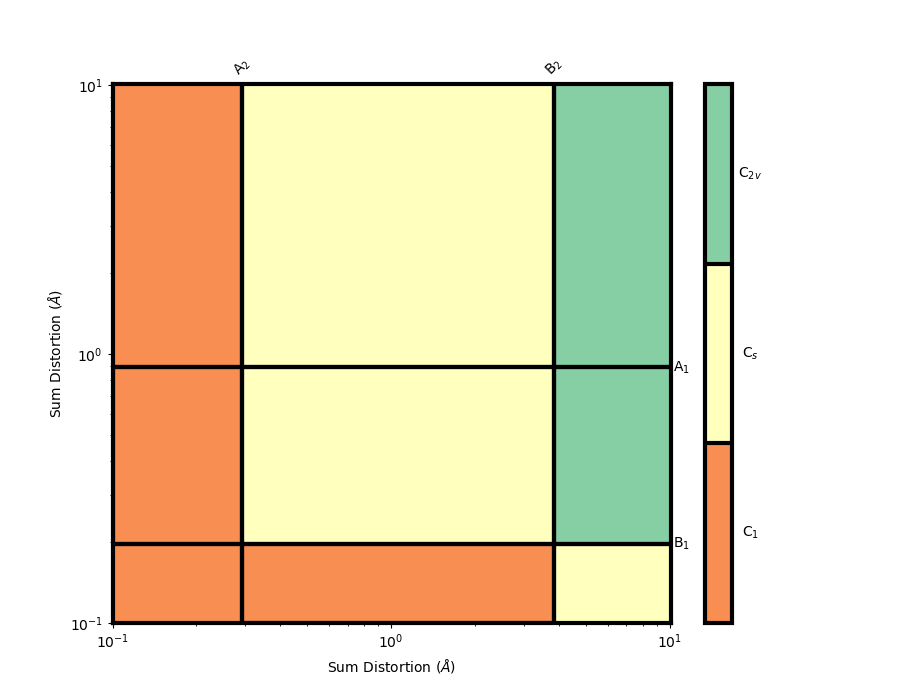

CCDC link,scsd link,√Σ(S(1)-S(2))2
POFQIN,POFQIN,0.123 Å
NUCMAC,NUCMAC,0.152 Å
MUWJIZ,MUWJIZ,0.167 Å
PESMOP,PESMOP,0.168 Å
IBOKUI,IBOKUI,0.168 Å


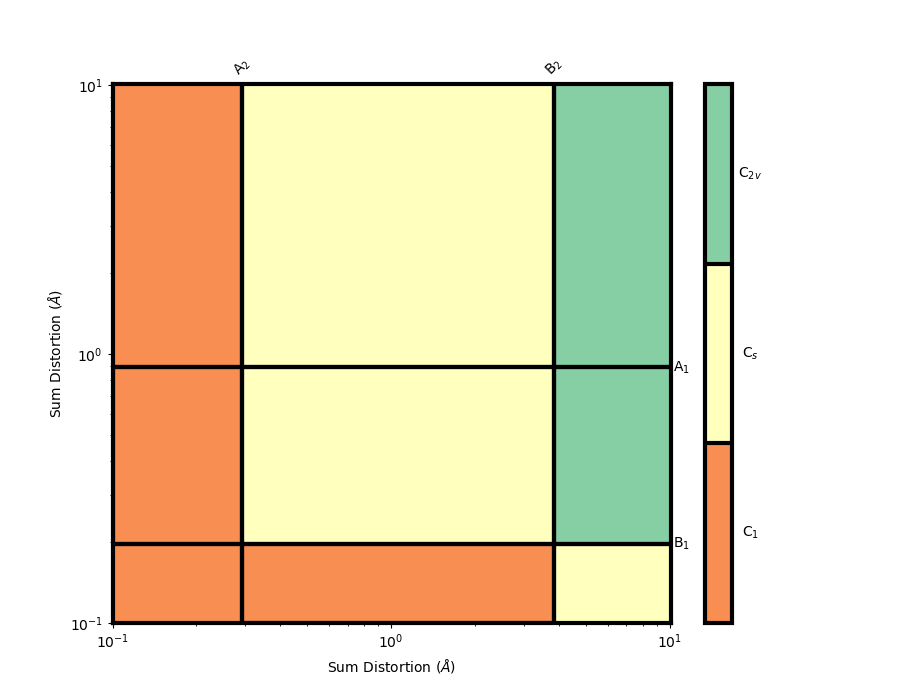

In [17]:
# displaying the figure
fig1 = scsdm.scsd_plotly(as_type='fig')
fig1.show()

%matplotlib widget
fig2 = scsdm.mondrian(as_type='fig')
fig2.show()

from IPython.display import display, HTML
display(HTML(scsdm.compare_table().partition('<button')[0]))

so, for the above material we might say that the conformation is 'folded', with a B<sub>2</sub> value of 3.84 Angstroms of sum atom movement, and a pinched O-side induced by the metal centre chelate.
The apparent symmetry is <i>C<sub>s</sub></i>. This diaza-xanthene exhibits a conformation similar to those of the common XANTPHOS ligand (POFQIN, NUCMAC), and less than the maximum observed distortion of this type (NIDYAD, [doi:10.1038/s41586-018-0037-y](http://dx.doi.org/10.1038/s41586-018-0037-y)). 

Were we to desire more in-depth analysis, we can pull up the scsd_collection object for xanthene. We'll recalculate the data we need from the already minimised and assigned coordinates, allowing use of 'bypass' to speed things up.

In [15]:
xan = scsd.scsd_collection('xanthene')

xan.plot_pca('B2')
xan.gen_simple_df(bypass=True)
xan.gen_complex_df()
xan.pca_kdeplot('B2')

from this we can see that the measured conformations are beween the 'flat' main cluster at zero, and the usual bent cluster around 5 Angstroms. Were we to want to see those distorted by twisting instead, we can pull up the "A2" figure, which shows only smaller dostortions usually observed. One can also see these data at www.kingsbury.id.au/scsd_model_ext/xanthene

Now we may have a structure which has no equivalent model. Here's where the model creation routines might come in - we'll make one for aza-bodipy below. The BODIPY itself has an interesting variability in how it coordinates the central boron depending on the presence of the 1,3,5,7-tetramethyl motif. We'll use HUYBAF as the model.
1. Download the data from the CCDC CSD or other source
2. Delete the atoms outside of the aza-bodipy core. This can be accomplished with a text editor, using the mercury "Edit Structure" tool (free), or in CrystalMaker (paid)
3. Save this structure as a .pdb file
I've done the above and huybaf can be loaded from the data folder

In [23]:
huybaf = scsd.yield_model(scsd.import_pdb(os.path.dirname(scsd.__file__)+'/data/tutorial/huybaf.pdb'), 'C2v', bhopping = False)
azabodipy = scsd.scsd_model('azabodipy', huybaf, 'C2v')
azabodipy.plotly_plot_model()

This should resemble an idealised azaBODIPY molecule. It it looks odd, rerun with bhopping = True.
This can also be accomplished using www.kingsbury.id.au/scsd_new_model with the above 'huybaf.pdb' and copying the data at the bottom of that page. This will have the advantage of making the azabodipy model available on the webserver.
Now, our new molecule that we might be interested in is a set that deviate from a plane - we can presume that the 